In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000,high=90.000,size=1500)
lngs = np.random.uniform(low=-180.000,high=180.000,size=1500)
lat_lngs=zip(lats,lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []

## Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)
    

602

In [7]:
import requests

In [8]:
# Import the API key.
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [10]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [11]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [12]:
# # Loop through all the cities in our list.
# for i in range(len(cities)):
    
#     # Group cities in sets of 50 for logging purposes.
#     if(i % 50 == 0 and i>= 50):
#         set_count += 1
#         record_count = 1
#     # Create endpoint URL with each city.
#     city_url = url + "&q=" + cities[i]    

In [13]:
# Loop through all the cities in our list.
#for i, item in enumerate(list):
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if(i % 50 == 0 and i>= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")  
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    #Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping ....")
        pass
        
    # Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
        
    

Processing Record 1 of Set 1 | cape town
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | busselton
Processing Record 4 of Set 1 | kokopo
Processing Record 5 of Set 1 | fortuna
Processing Record 6 of Set 1 | grand river south east
City not found. Skipping ....
Processing Record 7 of Set 1 | khatanga
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | thompson
Processing Record 10 of Set 1 | kahului
Processing Record 11 of Set 1 | hilo
Processing Record 12 of Set 1 | vaini
Processing Record 13 of Set 1 | punta arenas
Processing Record 14 of Set 1 | belushya guba
City not found. Skipping ....
Processing Record 15 of Set 1 | port lincoln
Processing Record 16 of Set 1 | ribeira grande
Processing Record 17 of Set 1 | cabo san lucas
Processing Record 18 of Set 1 | oriximina
Processing Record 19 of Set 1 | babanusah
City not found. Skipping ....
Processing Record 20 of Set 1 | puerto ayora
Processing Record 21 of Set 1 | college
Processing Record 22 of Se

Processing Record 38 of Set 4 | ostrovnoy
Processing Record 39 of Set 4 | ascoli piceno
Processing Record 40 of Set 4 | san patricio
Processing Record 41 of Set 4 | luderitz
Processing Record 42 of Set 4 | kamiiso
Processing Record 43 of Set 4 | paine
Processing Record 44 of Set 4 | umm lajj
Processing Record 45 of Set 4 | dukat
Processing Record 46 of Set 4 | rovaniemi
Processing Record 47 of Set 4 | vostok
Processing Record 48 of Set 4 | atambua
Processing Record 49 of Set 4 | isangel
Processing Record 50 of Set 4 | macusani
Processing Record 1 of Set 5 | busayra
Processing Record 2 of Set 5 | nanortalik
Processing Record 3 of Set 5 | ponta do sol
Processing Record 4 of Set 5 | kargasok
Processing Record 5 of Set 5 | touros
Processing Record 6 of Set 5 | teloloapan
Processing Record 7 of Set 5 | iranshahr
Processing Record 8 of Set 5 | chake chake
Processing Record 9 of Set 5 | synya
Processing Record 10 of Set 5 | mahebourg
Processing Record 11 of Set 5 | bolshoye nagatkino
Processi

City not found. Skipping ....
Processing Record 31 of Set 8 | nguiu
City not found. Skipping ....
Processing Record 32 of Set 8 | anadyr
Processing Record 33 of Set 8 | wuwei
Processing Record 34 of Set 8 | kizilskoye
Processing Record 35 of Set 8 | koulikoro
Processing Record 36 of Set 8 | bethal
Processing Record 37 of Set 8 | vung tau
Processing Record 38 of Set 8 | vanavara
Processing Record 39 of Set 8 | kernersville
Processing Record 40 of Set 8 | lavrentiya
Processing Record 41 of Set 8 | nouakchott
Processing Record 42 of Set 8 | borlange
City not found. Skipping ....
Processing Record 43 of Set 8 | santa maria
Processing Record 44 of Set 8 | ozgon
City not found. Skipping ....
Processing Record 45 of Set 8 | koratla
Processing Record 46 of Set 8 | yunjinghong
City not found. Skipping ....
Processing Record 47 of Set 8 | ust-nera
Processing Record 48 of Set 8 | vieques
Processing Record 49 of Set 8 | kaitangata
Processing Record 50 of Set 8 | karpogory
Processing Record 1 of Se

Processing Record 12 of Set 12 | lander
Processing Record 13 of Set 12 | mitsamiouli
Processing Record 14 of Set 12 | muros
Processing Record 15 of Set 12 | barao de melgaco
Processing Record 16 of Set 12 | yabelo
Processing Record 17 of Set 12 | banepa
Processing Record 18 of Set 12 | evensk
Processing Record 19 of Set 12 | camopi
Processing Record 20 of Set 12 | henties bay
Processing Record 21 of Set 12 | muriwai beach
Processing Record 22 of Set 12 | inhambane
Processing Record 23 of Set 12 | hofn
Processing Record 24 of Set 12 | nowy tomysl
Processing Record 25 of Set 12 | palmer
Processing Record 26 of Set 12 | looc
Processing Record 27 of Set 12 | cumana
Processing Record 28 of Set 12 | cassilandia
Processing Record 29 of Set 12 | bereda
Processing Record 30 of Set 12 | paranaiba
Processing Record 31 of Set 12 | monrovia
Processing Record 32 of Set 12 | jamu mare
Processing Record 33 of Set 12 | mount isa
Processing Record 34 of Set 12 | fereydunshahr
Processing Record 35 of Set

In [14]:
len(city_data)

552

In [15]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cape Town,-33.9258,18.4232,60.12,79,75,3.00,ZA,2021-10-22 16:26:36
1,Rikitea,-23.1203,-134.9692,73.89,81,100,24.81,PF,2021-10-22 16:26:20
2,Busselton,-33.6500,115.3333,50.09,74,7,7.36,AU,2021-10-22 16:24:49
3,Kokopo,-4.3520,152.2633,75.92,86,100,3.51,PG,2021-10-22 16:29:01
4,Fortuna,40.5982,-124.1573,56.93,75,75,7.00,US,2021-10-22 16:29:01


In [16]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Cape Town,ZA,2021-10-22 16:26:36,-33.9258,18.4232,60.12,79,75,3.00
1,Rikitea,PF,2021-10-22 16:26:20,-23.1203,-134.9692,73.89,81,100,24.81
2,Busselton,AU,2021-10-22 16:24:49,-33.6500,115.3333,50.09,74,7,7.36
3,Kokopo,PG,2021-10-22 16:29:01,-4.3520,152.2633,75.92,86,100,3.51
4,Fortuna,US,2021-10-22 16:29:01,40.5982,-124.1573,56.93,75,75,7.00


In [17]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [18]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

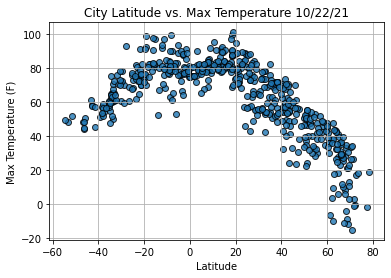

In [30]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

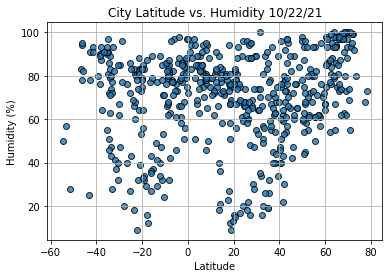

In [31]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

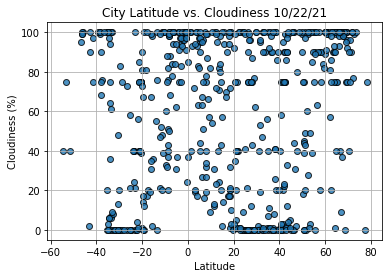

In [33]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

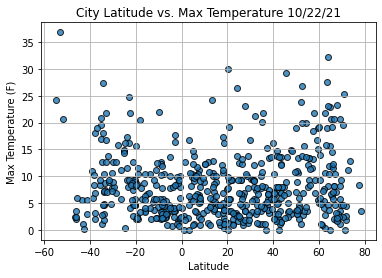

In [27]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()